Importing Libraries

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Load Data

In [130]:
# loading the data from csv file to pandas dataframe
mobile_dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mobile Price Classification/train.csv')

Data Analysis

In [131]:
# inspecting the first 5 rows of the dataframe
mobile_dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [132]:
# checking the number of rows and columns
mobile_dataset.shape

(2000, 21)

In [133]:
# getting some information about the dataset
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [134]:
# checking the number of missing values
mobile_dataset.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [135]:
# checking the distribution of categorical data
print(mobile_dataset.price_range.value_counts())

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


X & y array (Splitting the data and Target)

In [136]:
X=mobile_dataset.drop('price_range',axis=1)

In [137]:
y=mobile_dataset['price_range']

Splitting Training and Test data

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

Model Training

1. Creating & Training Linear Regression Model

In [139]:
from sklearn.linear_model import LinearRegression
# loading the linear regression model
lm = LinearRegression()

In [140]:
lm.fit(X_train,y_train)

LinearRegression()

In [141]:
lm.score(X_test,y_test)

0.9132801488185276

2. Creating & Training KNN Model

In [142]:
from sklearn.neighbors import KNeighborsClassifier
# loading the KNN model
knn = KNeighborsClassifier(n_neighbors=10)

In [143]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [144]:
knn.score(X_test,y_test)

0.9212121212121213

3. Creating & Training Logistic Regression Model

In [145]:
from sklearn.linear_model import LogisticRegression
# loading the Logistic Regression model
logmodel = LogisticRegression()

In [146]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
logmodel.score(X_test,y_test)

0.6181818181818182

4. Creating & Training Decision Tree Model


In [148]:
from sklearn.tree import DecisionTreeClassifier
# loading the Decision Tree model
dtree = DecisionTreeClassifier()

In [149]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [150]:
dtree.score(X_test,y_test)

0.806060606060606

5. Creating & Training Random Forest Model

In [151]:
from sklearn.ensemble import RandomForestClassifier
# loading the Random Forest model
rfc = RandomForestClassifier(n_estimators=200)

In [152]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [153]:
rfc.score(X_test,y_test)

0.8727272727272727

Conclusion: KNN & Linear Regression performed the best

RESULT : Linear Regression

In [154]:
y_pred=lm.predict(X_test)

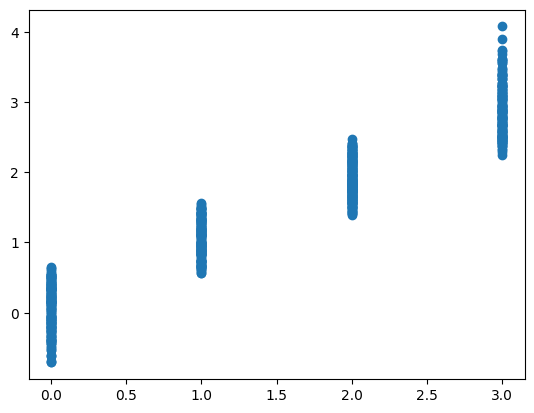

In [155]:
plt.scatter(y_test,y_pred)

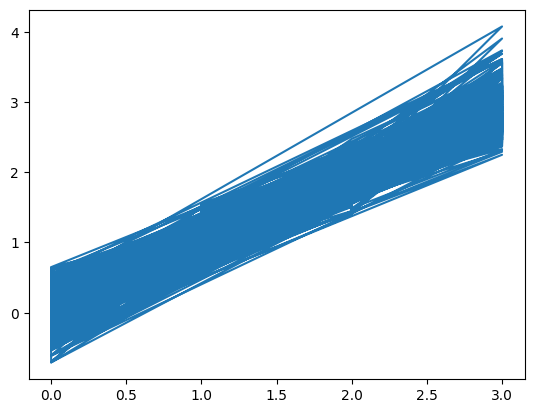

In [156]:
plt.plot(y_test,y_pred)

RESULT: KNN

In [157]:
from sklearn.metrics import classification_report,confusion_matrix

In [158]:
pred = knn.predict(X_test)

In [159]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       158
           1       0.87      0.94      0.91       152
           2       0.92      0.85      0.88       199
           3       0.93      0.92      0.93       151

    accuracy                           0.92       660
   macro avg       0.92      0.93      0.92       660
weighted avg       0.92      0.92      0.92       660



In [160]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[157   1   0   0]
 [  6 143   3   0]
 [  0  20 169  10]
 [  0   0  12 139]]


<Axes: >

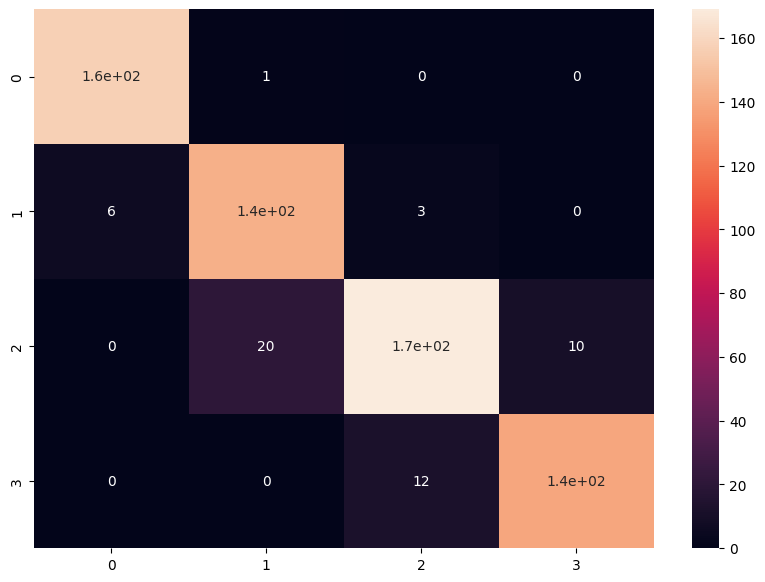

In [161]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

Price prediction of Test.csv Using KNN for Prediction

In [162]:
data_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mobile Price Classification/test.csv')

In [163]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [164]:
data_test=data_test.drop('id',axis=1)

In [165]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


Model

In [166]:
predicted_price=knn.predict(data_test)

In [167]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 1, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 1, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

Adding Predicted price to test.csv

In [168]:
data_test['price_range']=predicted_price

In [169]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


Pickling the model

In [170]:
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(knn, pickle_out)
pickle_out.close()